Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    

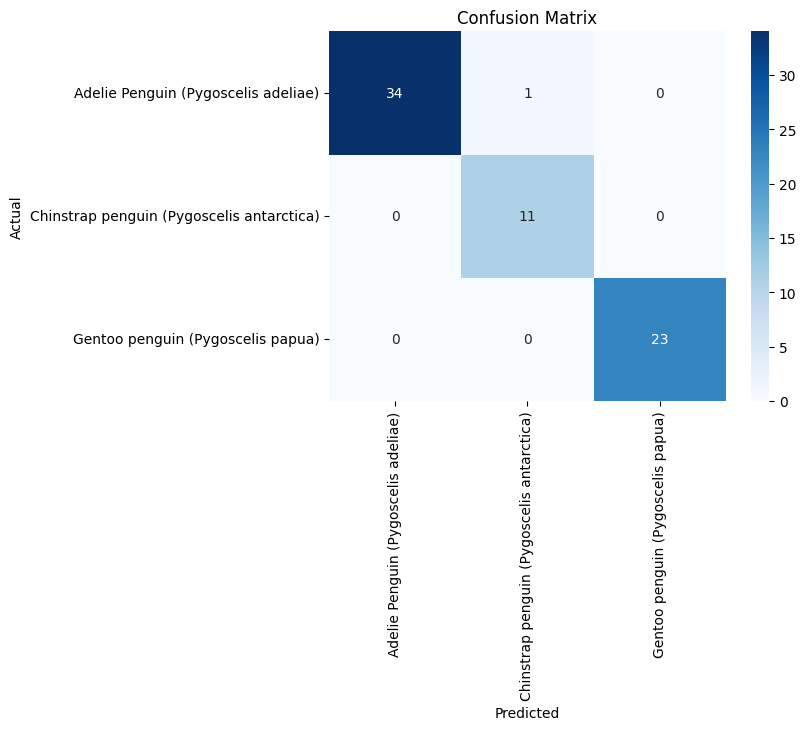


Best Model: LogisticRegression(C=10, max_iter=200, solver='saga')

Optimized Model Accuracy: 0.9855


<Figure size 800x600 with 0 Axes>

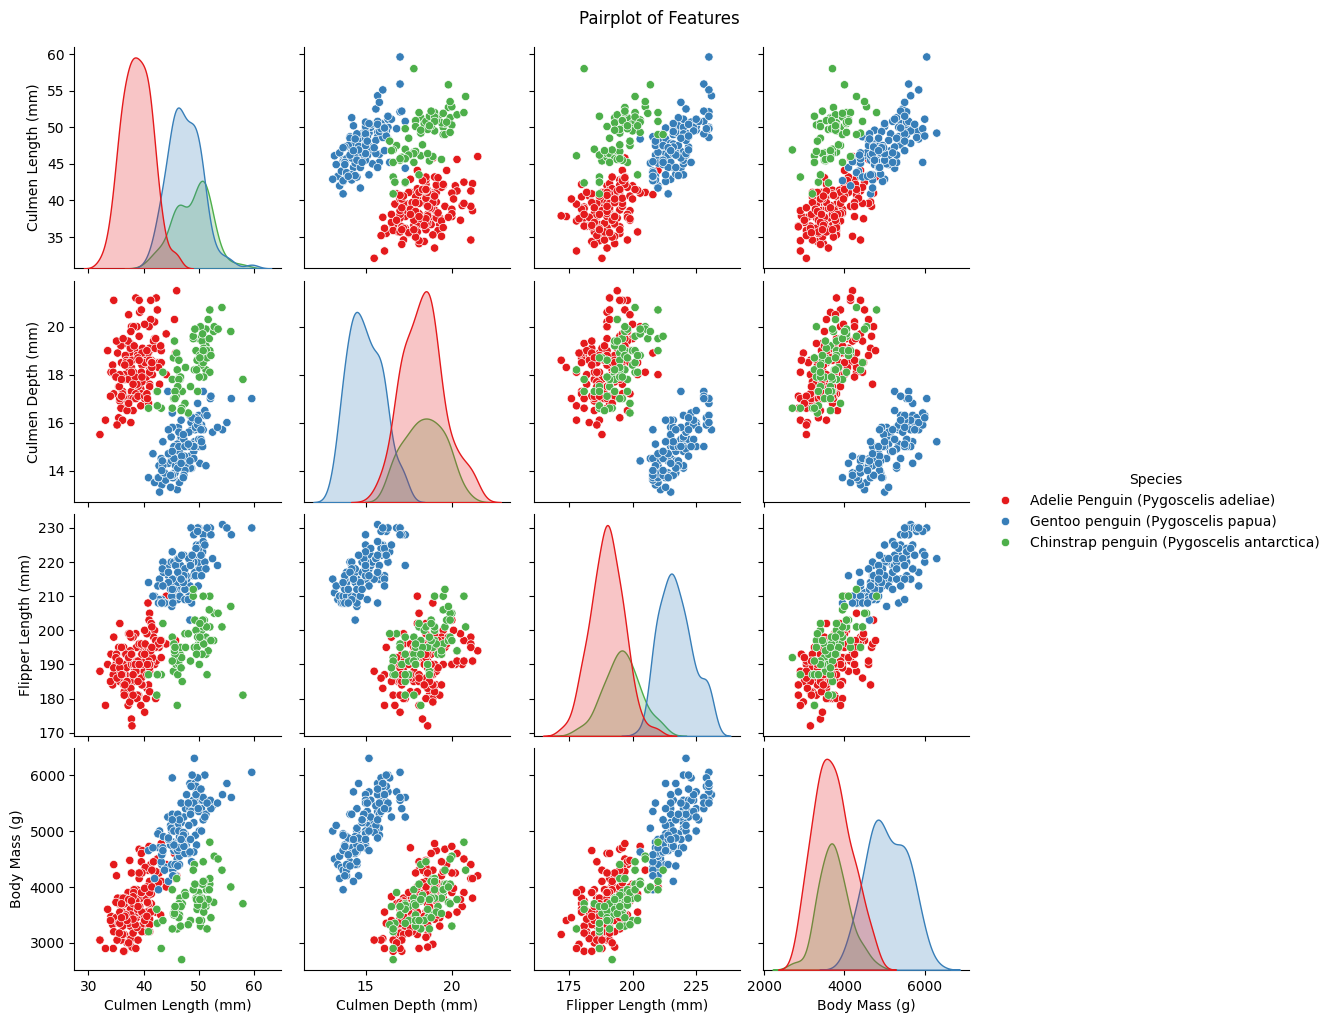

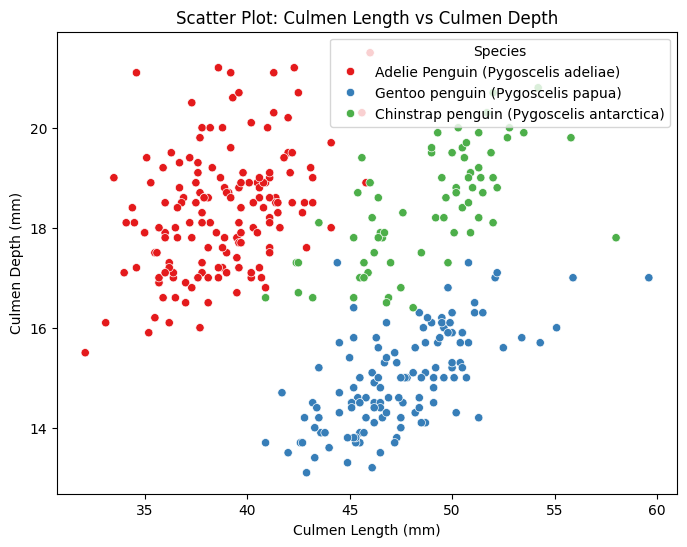

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# بارگذاری داده‌ها
file_path = "C:/Users/A.S.T.co/Downloads/penguins.csv"
penguins = pd.read_csv(file_path)

# نمایش اطلاعات اولیه داده‌ها
print("Initial Data Info:")
print(penguins.info())
print("Missing Values:\n", penguins.isnull().sum())

# انتخاب ویژگی‌ها و متغیر هدف
features = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
target_name = "Species"

# حذف داده‌های گم‌شده
penguins = penguins[features + [target_name]].dropna()

# تقسیم داده‌ها به ویژگی‌ها و متغیر هدف
X = penguins[features]
y = penguins[target_name]

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی (80% آموزش و 20% آزمون)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مقیاس‌دهی ویژگی‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# آموزش مدل رگرسیون لجستیک
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# پیش‌بینی با استفاده از داده‌های آزمایشی
y_pred = model.predict(X_test_scaled)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# گزارش دقیق از عملکرد مدل
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ماتریس اشتباهات
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# نمایش ماتریس اشتباهات با استفاده از seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# استفاده از GridSearchCV برای بهینه‌سازی هایپرپارامترها
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# بهترین مدل
best_model = grid_search.best_estimator_
print(f"\nBest Model: {best_model}")

# پیش‌بینی با استفاده از مدل بهینه‌شده
y_pred_best = best_model.predict(X_test_scaled)

# ارزیابی مدل بهینه‌شده
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nOptimized Model Accuracy: {accuracy_best:.4f}")


# ---- اضافه کردن نمودارها ----

# نمودار plot از ویژگی‌ها
plt.figure(figsize=(8, 6))
sns.pairplot(penguins[features + [target_name]], hue=target_name, palette="Set1")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# نمودار Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Culmen Length (mm)", y="Culmen Depth (mm)", hue=target_name, data=penguins, palette="Set1")
plt.title("Scatter Plot: Culmen Length vs Culmen Depth")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.show()

